In [ ]:
import numpy as np

from utils import KNNImageImputer, MeanImageImputer
from utils import Missingness
from utils import get_device
from utils import get_raw_data
from utils import plot_dec_performance, plot_experiment_results
from utils import run_dec_pipeline

In [ ]:
missingness = Missingness()
knn_imputer = KNNImageImputer(k=5)
mean_imputer = MeanImageImputer()

device = get_device()

corruption_type = 'mcar'
missingness_percentages = np.arange(0, 100, 5)

# Loading data

In [ ]:
tensor_x, labels, indices = get_raw_data('fashion_mnist', device=device)

# KNN Imputation

In [ ]:
ari_scores_knn = []
nmi_scores_knn = []

In [ ]:
for mcar_percent in missingness_percentages:
    missing_rate_float = mcar_percent / 100.0

    corruption_kwargs={
        'corruption_type': corruption_type,
        'missing_rate': missing_rate_float,
    }

    ari, nmi = run_dec_pipeline(
        X_clean=tensor_x,
        y_true=labels,
        data_indices=indices,
        missingness=missingness,
        imputer=knn_imputer,
        device=device,
        ae_epochs=30,
        dec_epochs=70,
        **corruption_kwargs,
    )

    ari_scores_knn.append(ari)
    nmi_scores_knn.append(nmi)

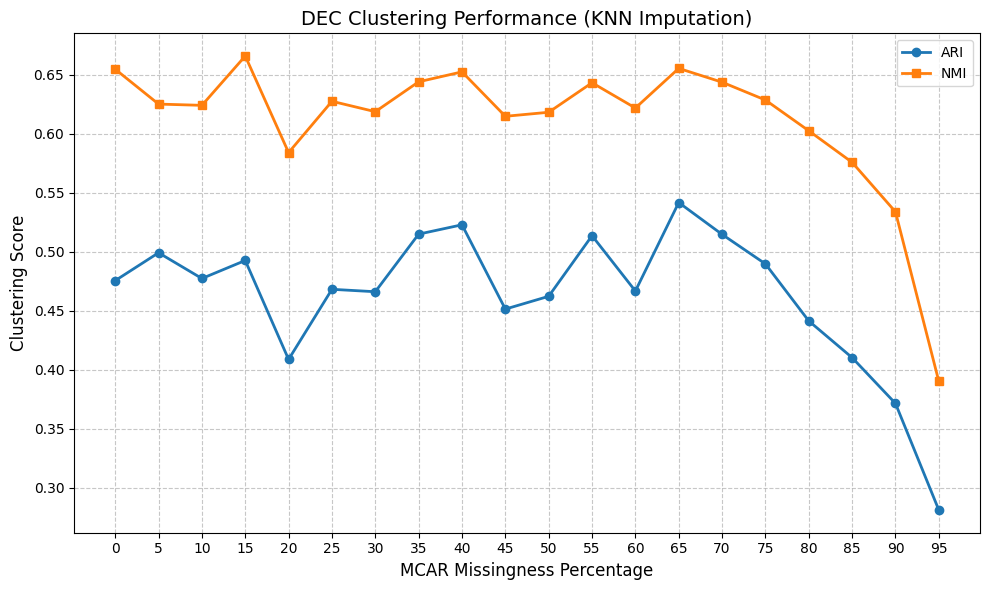

In [19]:
plot_dec_performance(
    missingness_percentages=missingness_percentages,
    score_arrays=[ari_scores_knn, nmi_scores_knn],
    labels=['ARI', 'NMI'],
    title='DEC Clustering Performance (KNN Imputation)'
)

# Mean imputation

In [ ]:
ari_scores_mean = []
nmi_scores_mean = []

In [ ]:
for mcar_percent in missingness_percentages:
    missing_rate_float = mcar_percent / 100.0

    corruption_kwargs={
        'corruption_type': corruption_type,
        'missing_rate': missing_rate_float,
    }

    ari, nmi = run_dec_pipeline(
        X_clean=tensor_x,
        y_true=labels,
        data_indices=indices,
        missingness=missingness,
        imputer=mean_imputer,
        device=device,
        ae_epochs=30,
        dec_epochs=70,
        **corruption_kwargs,
    )

    ari_scores_mean.append(ari)
    nmi_scores_mean.append(nmi)

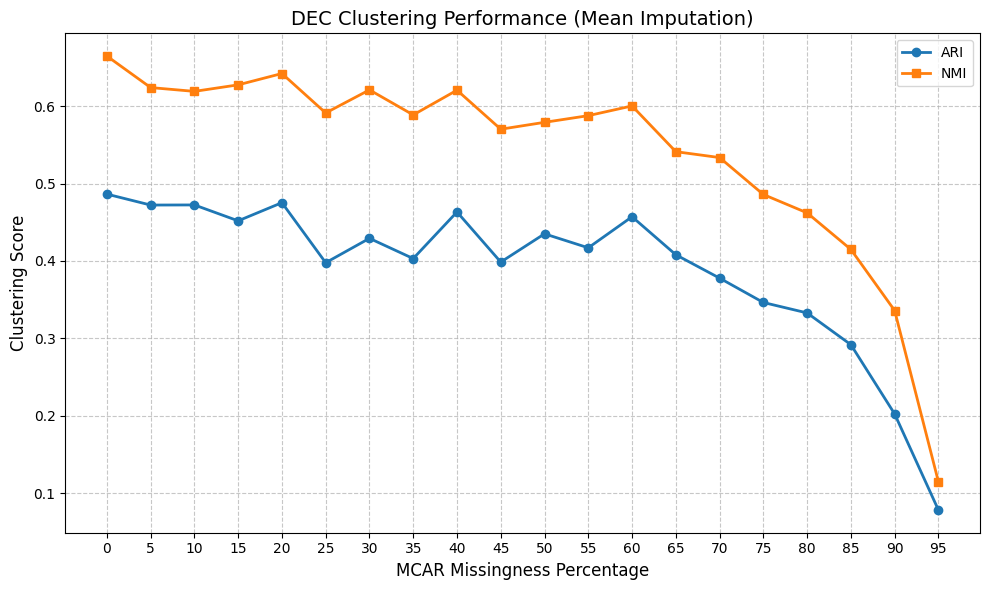

In [20]:
plot_dec_performance(
    missingness_percentages=missingness_percentages,
    score_arrays=[ari_scores_mean, nmi_scores_mean],
    labels=['ARI', 'NMI'],
    title='DEC Clustering Performance (Mean Imputation)'
)

# Denoising Autoencoder

In [ ]:
ari_scores_dae = []
nmi_scores_dae = []

In [ ]:
for mcar_percent in missingness_percentages:
    missing_rate_float = mcar_percent / 100.0

    corruption_kwargs={
        'corruption_type': corruption_type,
        'missing_rate': missing_rate_float,
    }

    ari, nmi = run_dec_pipeline(
        X_clean=tensor_x,
        y_true=labels,
        data_indices=indices,
        missingness=missingness,
        imputer=None,
        device=device,
        ae_epochs=30,
        dec_epochs=70,
        **corruption_kwargs,
    )

    ari_scores_dae.append(ari)
    nmi_scores_dae.append(nmi)

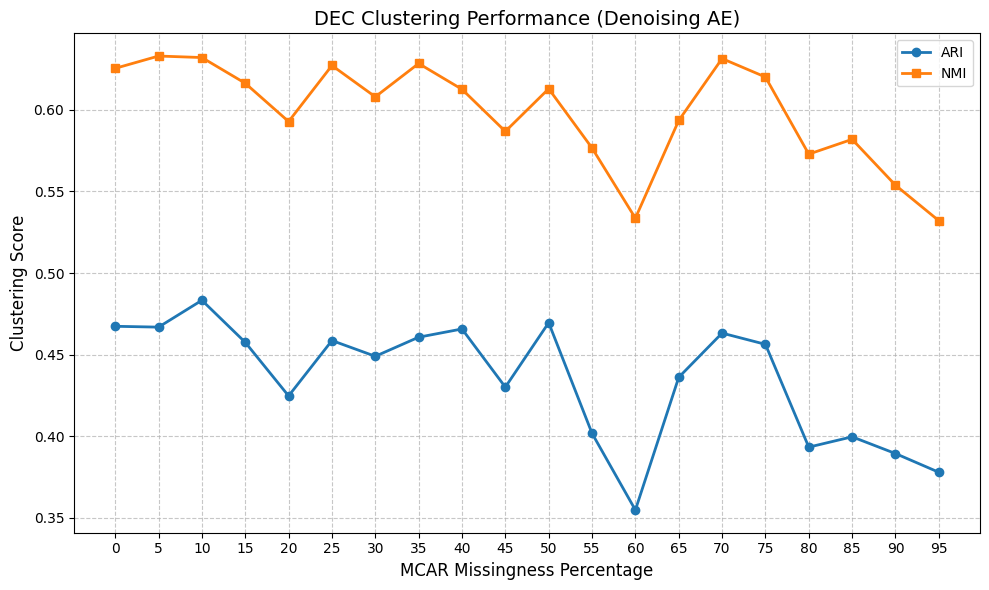

In [21]:
plot_dec_performance(
    missingness_percentages=missingness_percentages,
    score_arrays=[ari_scores_dae, nmi_scores_dae],
    labels=['ARI', 'NMI'],
    title='DEC Clustering Performance (Denoising AE)'
)

# Plotting Results

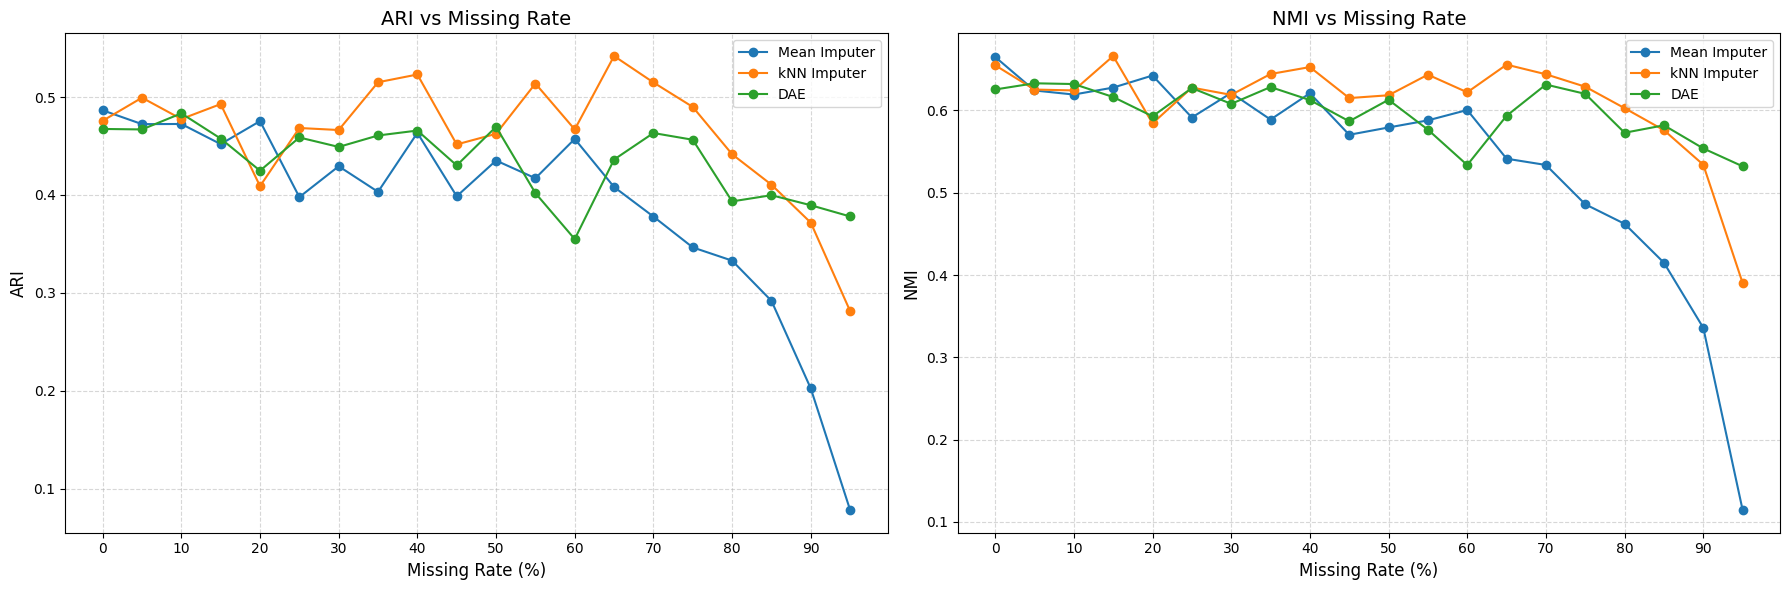

In [22]:
plot_experiment_results(
    missingness_percentages,
    ari_scores_mean, ari_scores_knn, ari_scores_dae,
    nmi_scores_mean, nmi_scores_knn, nmi_scores_dae
)